# Importações e primeiras informações

Para melhor exposição das informações, troquei as configurações do display. Seaborn será usado somente para elaboração de gráficos.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
sharks = pd.read_csv('data/attacks.csv', encoding='latin-1')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

# Primeira Análise

Aqui, usei os principais métodos para uma análise exploratória primária dos dados. Algumas foram mais significativas do que outras, que acrescentaram pouco.

## Info

In [2]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Análise breve: Vemos que, apesar dos 25 mil 

## Columns

In [3]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## DTypes

In [4]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [5]:
sharks.dtypes.value_counts()

object     22
float64     2
dtype: int64

In [6]:
sharks.select_dtypes(include='object')

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sharks.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             8702 non-null   object
 1   Date                    6302 non-null   object
 2   Type                    6298 non-null   object
 3   Country                 6252 non-null   object
 4   Area                    5847 non-null   object
 5   Location                5762 non-null   object
 6   Activity                5758 non-null   object
 7   Name                    6092 non-null   object
 8   Sex                     5737 non-null   object
 9   Age                     3471 non-null   object
 10  Injury                  6274 non-null   object
 11  Fatal (Y/N)             5763 non-null   object
 12  Time                    2948 non-null   object
 13  Species                 3464 non-null   object
 14  Investigator or Source  6285 non-null   object
 15  pd

## Describe

In [8]:
sharks.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


## Head

In [9]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Tail

In [10]:
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 With these preliminary data, we already know a lot about what needs to be cleaned. For example:
 - There are 25722 records, but most of its columns have only 6000 records; the tail method reveals that the last records are all NaN
 - There are columns that need to be dropped for lack of relevant information (or any information at all): The two 'unnamed' ones and probably the Case Number.1 and Case Number.2, which are duplicates of Case Number (which is more complete).
 - Most of the columns are of 'object' type, which means that some numeric columns are not correctly typed.
 - The columns 'Sex' and 'Species' have a space in its names.
 - The column 'Date' seems to be a duplicate of the Case Number column.
 - There are two columns of 'href', which leads to the question: why? Are they the same?
 - There are more-less 6302 records with more information, and some columns have a lot of missing information, like 'species' and 'time'
 - Why the min year is 0? We have records of 2023 years old? Probably, it's a NaN!

## Value counts:

In [11]:
for column in sharks.columns:
    print('=' * 75)
    print(f'Column name: {column.upper()}  --------  Nº of Registers: {len(sharks[sharks[column].notna()])}')
    print('=' * 75)
    print(sharks[column].value_counts())
    print('-' * 75)
    print('Unique records:')
    print('-' * 75)
    print(sharks[column].unique())
    print()

Column name: CASE NUMBER  --------  Nº of Registers: 8702
0               2400
1920.00.00.b       2
1966.12.26         2
2014.08.02         2
1990.05.10         2
                ... 
1999.09.05         1
1999.09.10         1
1999.09.16         1
1999.09.18         1
xx                 1
Name: Case Number, Length: 6287, dtype: int64
---------------------------------------------------------------------------
Unique records:
---------------------------------------------------------------------------
['2018.06.25' '2018.06.18' '2018.06.09' ... 'ND.0001' '0' 'xx']

Column name: DATE  --------  Nº of Registers: 6302
1957                          11
1942                           9
1956                           8
1958                           7
1950                           7
                              ..
01-Dec-1994                    1
Reported      10-Dec-1994      1
11-Dec-1994                    1
13-Dec-1994                    1
1845-1853                      1
Name: Date, Length

Column name: SPECIES   --------  Nº of Registers: 3464
White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.

# Data Cleaning

In [19]:
# Resumo
sharks = sharks.rename({'Sex ': 'Sex', 'Species ': 'Species'}, axis=1)
sharks = sharks.drop(['Case Number.1', 'Case Number.2'], axis=1)
sharks = sharks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)
sharks = sharks.drop('original order', axis=1)
sharks = sharks.drop(['href', 'href formula', 'pdf'], axis=1)
sharks = sharks.dropna(subset='Case Number', axis=0)
sharks = sharks.drop(sharks[sharks['Case Number'] == 'xx'].index)
sharks = sharks.drop(sharks[sharks['Case Number'] == '0'].index)

## Renaming Columns

In [13]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source'],
      dtype='object')

In [14]:
sharks = sharks.rename({'Sex ': 'Sex', 'Species ': 'Species'}, axis=1)

In [15]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source'],
      dtype='object')

## Dropping columns

### Case Number duplicada

In [16]:
sharks['Case Number'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6301 entries, 0 to 6301
Series name: Case Number
Non-Null Count  Dtype 
--------------  ----- 
6301 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [17]:
sum(sharks['Case Number'] == sharks['Case Number.1'])

KeyError: 'Case Number.1'

In [ ]:
sum(sharks['Case Number'] == sharks['Case Number.2'])

In [ ]:
sharks[sharks['Case Number'] != sharks['Case Number.1']][['Case Number', 'Case Number.1', 'Case Number.2']]

As colunas são basicamente iguais, em geral com diferenças de formatação, acréscimos que não se mantém iguais (um 'a' no final) ou, em alguns casos, um dado ligeiramente diferente (dia 6 em vez de 5); no geral, acho que vale a pena eliminar as colunas extras.

In [ ]:
sharks = sharks.drop(['Case Number.1', 'Case Number.2'], axis=1)

In [ ]:
sharks.head()

### Unnamed Columns

In [ ]:
sharks.columns

In [ ]:
sharks['Unnamed: 22'].value_counts()

In [ ]:
sharks['Unnamed: 23'].value_counts()

Dados inúteis à análise, eliminá-los

In [ ]:
sharks = sharks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [ ]:
sharks.columns

### Column Original Order

In [ ]:
sharks.sort_values(by='original order', ascending=True)

Parece ser basicamente o index invertido, com alguns problemas. Eu poderia simplesmente estabelecê-la como index, preservando a ordem original, mas não acredito que isso seja útil para a minha análise porque, para ver uma progressão no tempo, melhor fazer uso da data. Assim, vou excluí-la.

In [ ]:
sharks = sharks.drop('original order', axis=1)

In [ ]:
sharks.columns

### hrefs e pdf

In [ ]:
sum(sharks['href formula'] == sharks['href'])

In [ ]:
sharks['href formula'].count()

Apesar de não ser estritamente a mesma quantidade, dá para se considerar que é basicamente igual. Como não é, a princípio, algo que eu queira me deter na análise, mais fácil eliminar também. Pelo mesmo motivo, eliminarei o 'pdf'.

In [ ]:
sharks = sharks.drop(['href', 'href formula', 'pdf'], axis=1)

In [ ]:
sharks

## Dropping rows

In [ ]:
sharks = sharks.dropna(subset='Case Number', axis=0)

In [ ]:
sharks.tail()

In [ ]:
sharks = sharks.drop(sharks[sharks['Case Number'] == 'xx'].index)
sharks = sharks.drop(sharks[sharks['Case Number'] == '0'].index)

In [ ]:
sharks

## Type correction

Numeric columns should be:
- Year (already ok)
- Age
- original order (already ok)

### Age

In [ ]:
sharks['Age'].head(20)

In [ ]:
sharks['Age'].value_counts()

In [ ]:
sharks['Age'].unique()

Alright, this is a problem. I shall think if I drop the text records or if I just give up, losing important information. Maybe there is some way to only calculate the numeric data? Maybe a function called by map()?

In [ ]:
def convert_age(age):
    try:
        return int(age)
    except:
        return np.nan

In [ ]:
sharks['Age'].map(convert_age).mean()

In [ ]:
sharks['Age'].map(convert_age).describe()

It works!

## NaN analysis, filling or dropping

In [ ]:
sharks.columns

In [ ]:
sharks.loc[187, 'Year'] = 2017

In [ ]:
sharks.loc[6079, 'Year'] = 1836

In [ ]:
sharks[sharks['Year'].isna()]

## Duplicates?

In [ ]:
sum(sharks.duplicated())

Sem duplicatas estritamente falando

# Analysing the Data Again

In [ ]:
sharks.info()

In [ ]:
sharks.describe()

The year '0' means that the date is uncertain

In [ ]:
sharks[sharks['Year'] == sharks['Year'].min()]['Date'].value_counts()

In [ ]:
sharks.head()

In [ ]:
sharks.tail()

### Análise de localização

In [ ]:
sharks.groupby('Country').count().sort_values(by='Case Number', ascending=False)

In [ ]:
sharks_usa = sharks[sharks['Country'] == 'USA']

In [ ]:
sharks_usa['Area'].value_counts()

In [ ]:
sharks_usa_florida = sharks_usa[sharks_usa['Area'] == 'Florida']

In [ ]:
sharks_usa_florida.info()

In [ ]:
sharks_usa_florida['Location'].value_counts()

In [ ]:
sharks_usa_florida_new_smyrna = sharks_usa_florida[sharks_usa_florida['Location'] == 'New Smyrna Beach, Volusia County']

In [ ]:
mask_volusia = sharks_usa_florida['Location'].map(lambda x: str(x).endswith('Volusia County'))
sharks_usa_volusia_county = sharks_usa_florida[mask_volusia]

In [ ]:
sharks_usa_volusia_county.info()

In [ ]:
sharks_usa_volusia_county.select_dtypes('object').describe().T

# Analysing Hypothesis

What are the greatest mortality rates by country?

In [20]:
sharks['Fatality'] = sharks['Fatal (Y/N)'].map(lambda x:1 if x=='Y' else 0)

In [21]:
mask_usa_australia = (sharks['Country'] == 'USA') | (sharks['Country'] == 'AUSTRALIA')
sharks_loc_usa_australia = sharks[mask_usa_australia].copy()

Em toda a história de registros, há 2228 casos nos EUA e 1338 na Austrália.

In [22]:
sharks_loc_usa_australia['Country'].value_counts()

USA          2228
AUSTRALIA    1338
Name: Country, dtype: int64

O dataframe abaixo mostra todos os anos para cada um dos países com registros de ataques de tubarão.

Obs.: cabe limpeza, já que o ano zero é claramente errado.

In [23]:
sharks_usa_australia_year = sharks_loc_usa_australia.groupby(['Country', 'Year'])['Fatality'].agg(fatal_cases = 'sum', total_cases = 'count').reset_index()
sharks_usa_australia_year

,Country,Year,fatal_cases,total_cases
0,AUSTRALIA,0.0,8,16
1,AUSTRALIA,5.0,0,1
2,AUSTRALIA,1788.0,0,1
3,AUSTRALIA,1791.0,1,1
4,AUSTRALIA,1803.0,0,1
...,...,...,...,...
357,USA,2014.0,0,66
358,USA,2015.0,1,73
359,USA,2016.0,0,64
360,USA,2017.0,0,65


In [24]:
sharks_usa_australia_year['fatality_rate'] = sharks_usa_australia_year['fatal_cases'] / sharks_usa_australia_year['total_cases']

In [25]:
sharks_usa_australia_year

,Country,Year,fatal_cases,total_cases,fatality_rate
0,AUSTRALIA,0.0,8,16,0.500000
1,AUSTRALIA,5.0,0,1,0.000000
2,AUSTRALIA,1788.0,0,1,0.000000
3,AUSTRALIA,1791.0,1,1,1.000000
4,AUSTRALIA,1803.0,0,1,0.000000
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


Uma primeira facilitação de análise é excluir um certo intervalo de registros.

In [26]:
sharks_usa_australia_year_1900 = sharks_usa_australia_year[sharks_usa_australia_year['Year'] > 1900]
sharks_usa_australia_year_1900

,Country,Year,fatal_cases,total_cases,fatality_rate
64,AUSTRALIA,1901.0,1,2,0.500000
65,AUSTRALIA,1902.0,2,3,0.666667
66,AUSTRALIA,1903.0,4,4,1.000000
67,AUSTRALIA,1904.0,1,1,1.000000
68,AUSTRALIA,1905.0,1,6,0.166667
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


<Axes: xlabel='Year', ylabel='fatal_cases'>

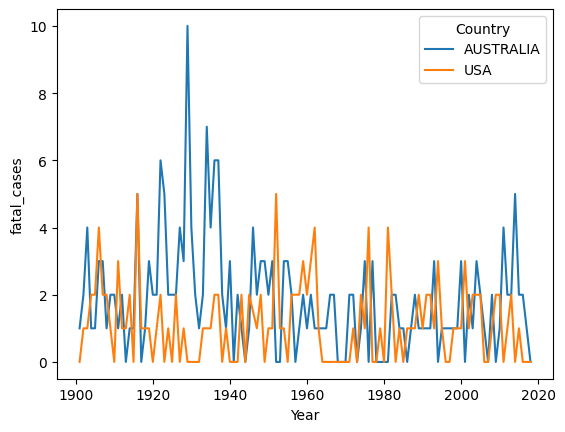

In [27]:
sns.lineplot(data=sharks_usa_australia_year_1900, x='Year', y='fatal_cases', hue='Country')

<Axes: xlabel='Year', ylabel='total_cases'>

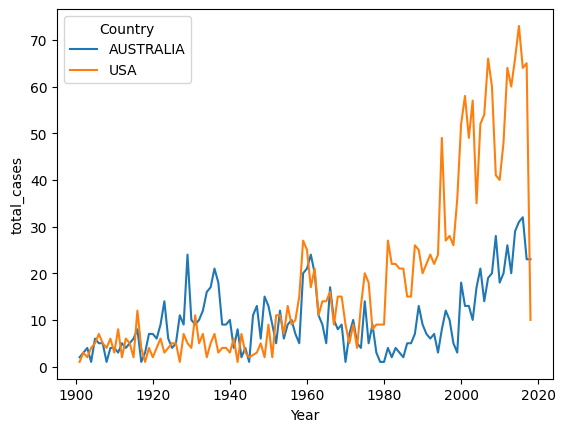

In [28]:
sns.lineplot(data=sharks_usa_australia_year_1900, x='Year', y='total_cases', hue='Country')

<Axes: xlabel='Year', ylabel='fatality_rate'>

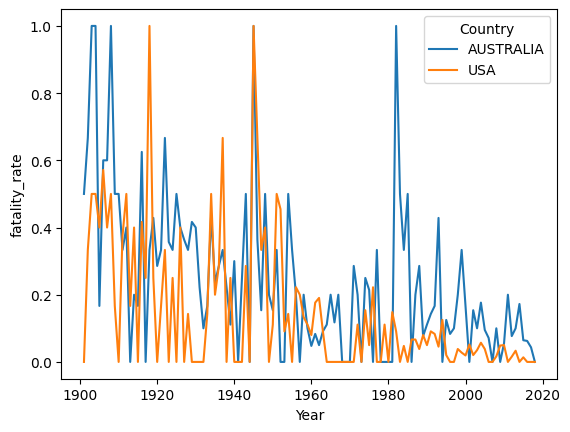

In [29]:
sns.lineplot(data=sharks_usa_australia_year_1900, x='Year', y='fatality_rate', hue='Country')

O gráfico abaixo mostra que há uma quantidade muito maior de registros dos USA a partir da década de 80, sempre tendendo ao crescimento. O número da Austrália cresce também, mas a quantidade total é sempre menor. Isso não necessariamente reflete um menor número de ataques de tubarão, mas um menor número de registros de ataques de tubarão. 

In [30]:
sharks_usa_australia_year_1900

,Country,Year,fatal_cases,total_cases,fatality_rate
64,AUSTRALIA,1901.0,1,2,0.500000
65,AUSTRALIA,1902.0,2,3,0.666667
66,AUSTRALIA,1903.0,4,4,1.000000
67,AUSTRALIA,1904.0,1,1,1.000000
68,AUSTRALIA,1905.0,1,6,0.166667
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


In [31]:
sharks_usa_australia_year_1960 = sharks_usa_australia_year[sharks_usa_australia_year['Year'] > 1960]
sharks_usa_australia_year_1960

,Country,Year,fatal_cases,total_cases,fatality_rate
124,AUSTRALIA,1961.0,2,24,0.083333
125,AUSTRALIA,1962.0,1,20,0.050000
126,AUSTRALIA,1963.0,1,11,0.090909
127,AUSTRALIA,1964.0,1,9,0.111111
128,AUSTRALIA,1965.0,1,5,0.200000
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


In [32]:
sharks_usa_australia_year_1960.groupby('Country').mean()

,Year,fatal_cases,total_cases,fatality_rate
Country,,,,
AUSTRALIA,1989.5,1.293103,11.775862,0.144176
USA,1989.5,1.051724,29.844828,0.043554


Mais de 3x fatality rate média!

In [33]:
mask_dec_60 = (sharks_usa_australia_year_1960['Year'] >= 1960) & (sharks_usa_australia_year_1960['Year'] < 1970)
mask_dec_70 = (sharks_usa_australia_year_1960['Year'] >= 1970) & (sharks_usa_australia_year_1960['Year'] < 1980)
mask_dec_80 = (sharks_usa_australia_year_1960['Year'] >= 1980) & (sharks_usa_australia_year_1960['Year'] < 1990)
mask_dec_90 = (sharks_usa_australia_year_1960['Year'] >= 1990) & (sharks_usa_australia_year_1960['Year'] < 2000)
mask_dec_2000 = (sharks_usa_australia_year_1960['Year'] >= 2000) & (sharks_usa_australia_year_1960['Year'] < 2010)
mask_dec_2010 = (sharks_usa_australia_year_1960['Year'] >= 2010) & (sharks_usa_australia_year_1960['Year'] < 2020)

sharks_usa_australia_year_1960[mask_dec_60].groupby('Country')['fatality_rate'].mean()

Country
AUSTRALIA    0.094778
USA          0.050873
Name: fatality_rate, dtype: float64

In [34]:
sharks_decade_variation = pd.DataFrame(
    [sharks_usa_australia_year_1960[mask_dec_60].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_70].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_80].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_90].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_2000].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_2010].groupby('Country')['fatality_rate'].mean(),
    ], index=['60s', '70s', '80s', '90s', '2000s', '2010s']
)

sharks_decade_variation

Country,AUSTRALIA,USA
60s,0.094778,0.050873
70s,0.128333,0.064829
80s,0.289597,0.053847
90s,0.169087,0.048134
2000s,0.086365,0.028750
2010s,0.086154,0.012517


<Axes: >

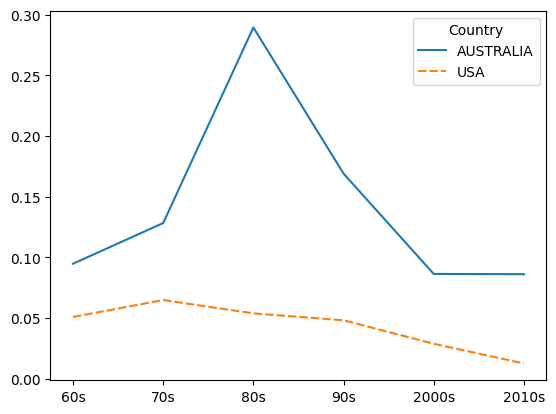

In [35]:
sns.lineplot(data=sharks_decade_variation)

In [41]:
sharks_usa_australia_year_1960['Decade'] = pd.cut(sharks_usa_australia_year_1960['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020])

C:\Users\alexa\AppData\Local\Temp\ipykernel_7948\3088559541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa_australia_year_1960['Decade'] = pd.cut(sharks_usa_australia_year_1960['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020])


In [72]:
decades_fatality_stats = sharks_usa_australia_year_1960.groupby(['Country', 'Decade']).agg(total_cases=('total_cases', 'sum'), fatal_cases=('fatal_cases', 'sum')).reset_index()

In [73]:
decades_fatality_stats

,Country,Decade,total_cases,fatal_cases
0,AUSTRALIA,"(1960, 1970]",114,10
1,AUSTRALIA,"(1970, 1980]",59,11
2,AUSTRALIA,"(1980, 1990]",54,11
3,AUSTRALIA,"(1990, 2000]",79,13
4,AUSTRALIA,"(2000, 2010]",173,12
5,AUSTRALIA,"(2010, 2020]",204,18
6,USA,"(1960, 1970]",141,8
7,USA,"(1970, 1980]",104,9
8,USA,"(1980, 1990]",214,13
9,USA,"(1990, 2000]",310,12


In [74]:
decades_fatality_stats['mean'] = decades_fatality_stats['fatal_cases'] / decades_fatality_stats['total_cases']

In [85]:
decades_fatality_stats

,Country,Decade,total_cases,fatal_cases,mean
0,AUSTRALIA,"(1960, 1970]",114,10,0.087719
1,AUSTRALIA,"(1970, 1980]",59,11,0.186441
2,AUSTRALIA,"(1980, 1990]",54,11,0.203704
3,AUSTRALIA,"(1990, 2000]",79,13,0.164557
4,AUSTRALIA,"(2000, 2010]",173,12,0.069364
5,AUSTRALIA,"(2010, 2020]",204,18,0.088235
6,USA,"(1960, 1970]",141,8,0.056738
7,USA,"(1970, 1980]",104,9,0.086538
8,USA,"(1980, 1990]",214,13,0.060748
9,USA,"(1990, 2000]",310,12,0.038710


In [98]:
decades_fatality_stats.sort_values(by='Decade')

,Country,Decade,total_cases,fatal_cases,mean
0,AUSTRALIA,"(1960, 1970]",114,10,0.087719
6,USA,"(1960, 1970]",141,8,0.056738
1,AUSTRALIA,"(1970, 1980]",59,11,0.186441
7,USA,"(1970, 1980]",104,9,0.086538
2,AUSTRALIA,"(1980, 1990]",54,11,0.203704
8,USA,"(1980, 1990]",214,13,0.060748
3,AUSTRALIA,"(1990, 2000]",79,13,0.164557
9,USA,"(1990, 2000]",310,12,0.038710
4,AUSTRALIA,"(2000, 2010]",173,12,0.069364
10,USA,"(2000, 2010]",512,15,0.029297
